## Task 1: Importing Libraries

In [1]:
import keras
import os
import shutil
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from platform import python_version
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img

print('Python version:', python_version())
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
from distutils.dir_util import copy_tree
#!rm -rf /content/*

Python version: 3.6.9
Numpy version: 1.18.5
Seaborn version: 0.11.0


In [2]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dropout
from keras_preprocessing.image import ImageDataGenerator

## Task 2: Dataset Creation

In [3]:
#Loading my kaggle API Key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajansh87","key":"792ad04bb02c58836d2ee490d28bff93"}'}

In [4]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [5]:
# Get datasets from kaggle
!kaggle datasets download -d biancaferreira/african-wildlife
!kaggle datasets download -d kdnishanth/animal-classification
!kaggle datasets download -d viswatejag/animal-detection-small-dataset
!kaggle datasets download -d jerrinbright/cheetahtigerwolf

 97% 436M/448M [00:03<00:00, 202MB/s]
100% 448M/448M [00:03<00:00, 120MB/s]
 95% 392M/414M [00:01<00:00, 229MB/s]
100% 414M/414M [00:01<00:00, 248MB/s]
100% 6.39G/6.40G [02:37<00:00, 53.0MB/s]
100% 6.40G/6.40G [02:37<00:00, 43.7MB/s]
 99% 2.49G/2.51G [01:01<00:00, 51.6MB/s]
100% 2.51G/2.51G [01:01<00:00, 43.6MB/s]


In [6]:
os.mkdir("/content/train_data")
os.mkdir("/content/train_data/data")
os.mkdir("/content/tem/")
!rm -rf /content/sample_data/*
!rmdir /content/sample_data

rmdir: failed to remove '/content/sample_data': No such file or directory


In [7]:
#unzip datasets to local directory
!unzip -q "/content/african-wildlife.zip" -d "/content/temp/"
!unzip -q "/content/animal-classification.zip" -d "/content/temp/"
!unzip -q "/content/animal-detection-small-dataset.zip" -d "/content/temp/"
!unzip -q "/content/cheetahtigerwolf.zip" -d "/content/temp/"
#now after this delete them from disk manually
!rm -rf /content/african-wildlife.zip
!rm -rf /content/animal-classification.zip
!rm -rf /content/animal-detection-small-dataset.zip
!rm -rf /content/cheetahtigerwolf.zip
!rm -rf /content/kaggle.json

In [8]:
!rm -rf /content/temp/test/test/*
!rmdir /content/temp/test/test/
!rmdir /content/temp/test/
!mv /content/temp/train/train/* /content/temp/

mv: cannot move '/content/temp/train/train/buffalo' to '/content/temp/buffalo': Directory not empty
mv: cannot move '/content/temp/train/train/horse' to '/content/temp/horse': Directory not empty


In [9]:
!rm -rf /content/temp/train/train/
!rmdir /content/temp/train/train/
!rmdir /content/temp/train/
!rm -f /content/temp/data.py

rmdir: failed to remove '/content/temp/train/train/': No such file or directory


In [10]:
!mv /content/temp/ANIMAL-N30/ANIMALS/* /content/temp/
!mv /content/temp/ANIMALS/ANIMALS/* /content/temp/

mv: cannot move '/content/temp/ANIMALS/ANIMALS/CHEETAH' to '/content/temp/CHEETAH': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/CROCODILES' to '/content/temp/CROCODILES': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/ELEPHANT' to '/content/temp/ELEPHANT': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/GIRAFFE' to '/content/temp/GIRAFFE': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/LION' to '/content/temp/LION': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/PANDA' to '/content/temp/PANDA': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/RHINO' to '/content/temp/RHINO': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/TIGER' to '/content/temp/TIGER': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/WOLF' to '/content/temp/WOLF': Directory not empty
mv: cannot move '/content/temp/ANIMALS/ANIMALS/ZEBRA' to '/content/temp/ZEBRA': 

In [11]:
!rm -rf /content/temp/ANIMAL-N30/ANIMALS/*
!rm -rf /content/temp/ANIMALS/ANIMALS/*

In [12]:
!rmdir /content/temp/ANIMAL-N30/ANIMALS
!rmdir /content/temp/ANIMALS/ANIMALS

In [13]:
!rmdir /content/temp/ANIMALS
!rmdir /content/temp/ANIMAL-N30
!mv /content/temp /content/tem/

In [14]:
#convert names of all sub-directories in our data to lowercase
import os
path='/content/tem/temp/'
for file in os.listdir(path):
    if file!=file.lower():
        os.rename(path+file,file.lower())
#after this all the directories whose names were in uppercase gets converted to lowercase and comes outside /temp/ directory.

In [15]:
#copying all the directories from data which were already in lowercase and didn't came outside the /temp/ directory 
fromDirectory="/content/tem/temp/"
toDirectory="/content/tem/"
copy_tree(fromDirectory,toDirectory)
#now all data is been converted to lowercase and are at /tem/


['/content/tem/cow/cow/cow.133.jpeg',
 '/content/tem/cow/cow/cow.658.jpeg',
 '/content/tem/cow/cow/cow.186.jpeg',
 '/content/tem/cow/cow/cow.1681.jpeg',
 '/content/tem/cow/cow/cow.1188.jpeg',
 '/content/tem/cow/cow/cow.1714.jpeg',
 '/content/tem/cow/cow/cow.32.jpeg',
 '/content/tem/cow/cow/cow.1519.jpeg',
 '/content/tem/cow/cow/cow.1206.jpeg',
 '/content/tem/cow/cow/cow.14.jpeg',
 '/content/tem/cow/cow/cow.1506.jpeg',
 '/content/tem/cow/cow/cow.1513.jpeg',
 '/content/tem/cow/cow/cow.106.jpeg',
 '/content/tem/cow/cow/cow.613.jpeg',
 '/content/tem/cow/cow/cow.1722.jpeg',
 '/content/tem/cow/cow/cow.148.jpeg',
 '/content/tem/cow/cow/cow.426.jpeg',
 '/content/tem/cow/cow/cow.55.jpeg',
 '/content/tem/cow/cow/cow.946.jpeg',
 '/content/tem/cow/cow/cow.1484.jpeg',
 '/content/tem/cow/cow/cow.1347.jpeg',
 '/content/tem/cow/cow/cow.1289.jpeg',
 '/content/tem/cow/cow/cow.72.jpeg',
 '/content/tem/cow/cow/cow.395.jpeg',
 '/content/tem/cow/cow/cow.1772.jpeg',
 '/content/tem/cow/cow/cow.640.jpeg',
 '/c

In [16]:
#delete all files inside /temp/
!rm -rf /content/tem/temp/
!rmdir /content/tem/temp
for file in os.listdir('/content/'):
  if file!="tem":
    loc="/content/"+file
    !mv $file /content/tem/

rmdir: failed to remove '/content/tem/temp': No such file or directory
mv: cannot move 'cow' to '/content/tem/cow': Directory not empty
mv: cannot move 'walrus' to '/content/tem/walrus': Directory not empty
mv: cannot move 'moose' to '/content/tem/moose': Directory not empty
mv: cannot move 'wolf' to '/content/tem/wolf': Directory not empty
mv: cannot move 'horse' to '/content/tem/horse': Directory not empty
mv: cannot move 'elephant' to '/content/tem/elephant': Directory not empty
mv: cannot move 'zebra' to '/content/tem/zebra': Directory not empty
mv: cannot move 'rhino' to '/content/tem/rhino': Directory not empty
mv: cannot move 'hippopotamus' to '/content/tem/hippopotamus': Directory not empty
mv: cannot move 'goat' to '/content/tem/goat': Directory not empty


In [17]:
#remove unneccessary files
for file in os.listdir('/content/'):
  if file!="tem":
    loc="/content/"+file
    !rm -rf $file

In [18]:
!mv tem data

In [19]:
# Worked over all the redundancy from data.
!cd data
!mv /content/data/bobcat/* /content/data/cat/;mv /content/data/cats/* /content/data/cat/;mv /content/data/persian+cat/* /content/data/cat/;
!mv /content/data/siamese+cat/* /content/data/cat/;rm -rf /content/data/bobcat/;rm -rf /content/data/cats;rm -rf /content/data/siamese+cat/;
!rm -rf /content/data/persian+cat/;mv /content/data/dogs/* /content/data/dog;rmdir /content/data/dogs;mv /content/data/spider+monkey/* /content/data/monkey;
!rmdir /content/data/spider+monkey;mv /content/data/german+shepherd/* /content/data/dog/;rmdir /content/data/german+shepherd;mv /content/data/grizzly+bear/* /content/data/bear/;
!rmdir /content/data/grizzly+bear;mv /content/data/rhino/* /content/data/rhinoceros/;rmdir /content/data/rhino;rm -rf /content/data/hen;
!rm -rf /content/data/butterfly;rm -rf /content/data/spyder;rm -rf /content/data/meta-data/meta-data/; rmdir /content/data/meta-data/meta-data;rmdir /content/data/meta-data;
!cd ..  

rmdir: failed to remove '/content/data/meta-data/meta-data': No such file or directory


In [20]:
#dropping some data:
!rm -rf /content/data/antelope/* 
!rmdir /content/data/antelope
!rm -rf /content/data/beaver/*
!rmdir /content/data/beaver
!rm -rf /content/data/chihuahua/*
!rmdir /content/data/chihuahua/
!rm -rf /content/data/collie/*
!rmdir /content/data/collie
!rm -rf /content/data/dalmatian/*
!rmdir /content/data/dalmatian
!rm -rf /content/data/killer+whale/*
!rmdir /content/data/killer+whale
!rm -rf /content/data/meerkat/*
!rmdir /content/data/meerkat
!rm -rf /content/data/mole/*
!rmdir /content/data/mole
!rm -rf /content/data/mouse/*
!rmdir /content/data/mouse
!rm -rf /content/data/otter/*
!rmdir /content/data/otter
!rm -rf /content/data/ox/*
!rmdir /content/data/ox
!rm -rf /content/data/porcupine/*
!rmdir /content/data/porcupine
!rm -rf /content/data/rat/*
!rmdir /content/data/rat
!rm -rf /content/data/seal/*
!rmdir /content/data/seal/
!rm -rf /content/data/squirel/*
!rmdir /content/data/squirel
!rm -rf /content/data/squirrel/*
!rmdir /content/data/squirrel/
!rm -rf /content/data/weasel/*
!rmdir /content/data/weasel



In [21]:
#create test data set
os.mkdir("test_data")

In [22]:
# make dirctories inside test_data with same name as of data
data_path='/content/data/'
test_path='/content/test_data/'
for name in os.listdir(data_path):
    os.mkdir(test_path+name)

In [23]:
mv data train_data

In [24]:
!rm -rf /content/train_data/train_data/data/*
!rmdir /content/train_data/train_data/data
!rmdir /content/train_data/train_data

!rm -rf /content/test_data/train_data/data/*
!rmdir /content/test_data/train_data/data
!rmdir /content/test_data/train_data

!rm -rf /content/train_data/cat/dog/
!rmdir /content/train_data/cat/dog
!rm -rf /content/train_data/dog/dog/
!rmdir /content/train_data/dog/dog

!mv /content/train_data/cow/cow/* /content/train_data/cow/
!mv /content/train_data/elephant/elephant/* /content/train_data/elephant/
!mv /content/train_data/goat/goat/* /content/train_data/goat/
!mv /content/train_data/horse/horse/* /content/train_data/horse/

!rmdir /content/train_data/cow/cow
!rmdir /content/train_data/elephant/elephant
!rmdir /content/train_data/goat/goat
!rmdir /content/train_data/horse/horse

!rm -rf /content/train_data/.config/
!rmdir /content/train_data/.config/

rmdir: failed to remove '/content/test_data/train_data/data': No such file or directory
rmdir: failed to remove '/content/train_data/cat/dog': No such file or directory
rmdir: failed to remove '/content/train_data/dog/dog': No such file or directory
rmdir: failed to remove '/content/train_data/.config/': No such file or directory


In [25]:
#remove all extra images from each file
path='/content/train_data/'
total_images=0
for file in os.listdir(path):
  size=len(os.listdir(path+file+'/'))
  if size>1250:
    c=1
    while size>1250:
      images=os.listdir(path+file+'/')
      os.remove(path+file+'/'+images[0])
      size=len(os.listdir(path+file+'/'))
  total_images+=size
  print(file,size)
print("Total images are : ",total_images)



cow 1250
walrus 148
kangaroo 832
dog 1250
cat 1250
panda 846
moose 476
bat 256
bear 1250
raccoon 346
deer 920
ostrich 810
wolf 403
crocodiles 801
tiger 721
monkey 1034
rabbit 837
lion 806
rhinoceros 1229
penguins 814
horse 1250
elephant 1250
cheetah 829
zebra 752
hippopotamus 464
chimpanzee 477
goat 1250
snake 874
giraffe 866
tortoise 819
buffalo 752
Total images are :  25862


In [26]:
# create test_data by taking 25% images from data

total_train_images,total_test_images,total_train_classes,total_test_classes=0,0,0,0
path="/content/train_data/"
for file in os.listdir(path):
    if "notebook" not in file:
        total_train_classes+=1
        total_images=len(os.listdir(path+file+"/"))
        test_image_count=(25/100)*total_images #25% for test and 75% for train
        for i in range(math.ceil(test_image_count)):
            img=random.choice(os.listdir(path+file+'/'))
            shutil.move(path+file+'/'+img,'/content/test_data/'+file+'/')
            #print(img)
        print(file,total_images,math.ceil(test_image_count))
        total_train_images+=(total_images-math.ceil(test_image_count))
        #print(file,math.ceil(test_image_count))
print("total train images are : ",total_train_images," and total train classes are : ",total_train_classes)

cow 1250 313
walrus 148 37
kangaroo 832 208
dog 1250 313
cat 1250 313
panda 846 212
moose 476 119
bat 256 64
bear 1250 313
raccoon 346 87
deer 920 230
ostrich 810 203
wolf 403 101
crocodiles 801 201
tiger 721 181
monkey 1034 259
rabbit 837 210
lion 806 202
rhinoceros 1229 308
penguins 814 204
horse 1250 313
elephant 1250 313
cheetah 829 208
zebra 752 188
hippopotamus 464 116
chimpanzee 477 120
goat 1250 313
snake 874 219
giraffe 866 217
tortoise 819 205
buffalo 752 188
total train images are :  19384  and total train classes are :  31


## Task 3: Image Augmentation

In [27]:
#url : https://keras.io/api/preprocessing/image/ 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        '/content/train_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        '/content/test_data/',
        target_size=(32,32),
        color_mode="grayscale",
        batch_size=64,
        class_mode='categorical')

Found 18385 images belonging to 31 classes.
Found 6127 images belonging to 31 classes.


In [28]:
training_set.class_indices # to see classes of our dataset

{'bat': 0,
 'bear': 1,
 'buffalo': 2,
 'cat': 3,
 'cheetah': 4,
 'chimpanzee': 5,
 'cow': 6,
 'crocodiles': 7,
 'deer': 8,
 'dog': 9,
 'elephant': 10,
 'giraffe': 11,
 'goat': 12,
 'hippopotamus': 13,
 'horse': 14,
 'kangaroo': 15,
 'lion': 16,
 'monkey': 17,
 'moose': 18,
 'ostrich': 19,
 'panda': 20,
 'penguins': 21,
 'rabbit': 22,
 'raccoon': 23,
 'rhinoceros': 24,
 'snake': 25,
 'tiger': 26,
 'tortoise': 27,
 'walrus': 28,
 'wolf': 29,
 'zebra': 30}

## Task 3: Model Creation

In [29]:
#creating an instance of Sequence which is as model
model = Sequential()

In [30]:
#inputlayer : apply filters
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu',
                   input_shape=(32, 32, 1)))

In [31]:
# pooling layer where we are doing maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
#adding one more convolution layer for better model
model.add(Convolution2D(filters=32, 
                        kernel_size=(3,3),
                        strides=(1,1),
                        padding='same', 
                        activation='relu'
                      ))

In [33]:
#adding one more Pooling layer for better model
model.add(MaxPooling2D(pool_size=(2, 2)))

In [34]:
#dropout regularlization
model.add(Dropout(0.5))

In [35]:
#layer in which we are converting 2d/3d image to 1d image i.e flattening
model.add(Flatten())

In [36]:
# layer: appling relu to give positive output from here our hidden layerrs starts
model.add(Dense(units=80, activation='relu'))

In [37]:
#dropout regularlization
model.add(Dropout(0.5))

In [38]:
# output layer : Since we have to do multi-class classification so we'll apply softmax activation function 
# we have 31 classes of animals so output layer would have that many neurons.
model.add(Dense(units=31, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 80)                1

## Task 5: Model Training

In [ ]:
history = model.fit(
        training_set,
        steps_per_epoch=(18385/64),
        epochs=400,
        verbose=1,
        validation_data=test_set,
        validation_steps=(6127/64))
#Total images in train_data = 18385    
#Total images in test_data = 6127    
#epoch=400

Epoch 1/400
 44/287 [===>..........................] - ETA: 2:25 - loss: 3.4069 - accuracy: 0.0419

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


288/287 [==============================] - 209s 726ms/step - loss: 3.3314 - accuracy: 0.0637 - val_loss: 3.2171 - val_accuracy: 0.1056
Epoch 2/400
288/287 [==============================] - 180s 626ms/step - loss: 3.1781 - accuracy: 0.1112 - val_loss: 3.0561 - val_accuracy: 0.1435
Epoch 3/400
288/287 [==============================] - 176s 612ms/step - loss: 3.0905 - accuracy: 0.1328 - val_loss: 3.0052 - val_accuracy: 0.1523
Epoch 4/400
288/287 [==============================] - 176s 610ms/step - loss: 3.0323 - accuracy: 0.1422 - val_loss: 2.8883 - val_accuracy: 0.1866
Epoch 5/400
288/287 [==============================] - 175s 608ms/step - loss: 2.9942 - accuracy: 0.1526 - val_loss: 2.8728 - val_accuracy: 0.1957
Epoch 6/400
288/287 [==============================] - 176s 610ms/step - loss: 2.9501 - accuracy: 0.1628 - val_loss: 2.8400 - val_accuracy: 0.1980
Epoch 7/400
288/287 [==============================] - 175s 609ms/step - loss: 2.9283 - accuracy: 0.1738 - val_loss: 2.9154 - val_

## Task 6: Accuracy

In [128]:
finalAccuracy = history.history["accuracy"]
finalAccuracy

[0.17034640908241272]

In [129]:
val_accuracy = history.history['val_accuracy']
val_accuracy

[0.18716903030872345]

In [130]:
finalloss = history.history["loss"]
finalloss

[3.1496126651763916]

In [ ]:
finalval_loss = history.history["val_loss"]
finalval_loss

In [ ]:
#Graphing our training and validation
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
model.save("iwildcam_model.h5")#save model

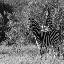

In [ ]:
from keras.preprocessing import image
test_image = image.load_img("/content/train_data/zebra/zebra102.jpg",target_size=(64,64),color_mode='grayscale')
test_image 


In [ ]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)


In [ ]:
test_image.shape

(1, 64, 64, 1)

In [ ]:
result = model.predict(test_image)

my_dict=training_set.class_indices
def get_key(val): 
    for key, value in my_dict.items(): 
         if val == value: 
             return key 
  
    return "key doesn't exist"

pred=list(result[0])
for i in range(len(pred)):
    if pred[i]!=0:
        print(get_key(i))

tortoise
